## Initialize global variables

In [1]:
%matplotlib notebook

import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import seaborn as sns


# import mpl_toolkits.mplot3d.axes3d as p3

# %matplotlib notebook


# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# import seaborn as sns

NOTEBOOK_DIR = globals()['_dh'][0]
PROJECT_DIR = os.path.join(NOTEBOOK_DIR, '..')
METAFEATURES = 'metafeatures.h5'

In [2]:
os.chdir(PROJECT_DIR)

from src.constants.miscellaneous import DATA, PATCH_DDSM_PROCESSED

from src.data.CBIS.cbis_directory_structure_helper import PNGMetafeatureColumns, PngImageType, AbnormalityType, \
    DataSetTypes, DICOMMetadataCols, Pathology, PatchMetadataCols, PatchDatasetFileNames

DATA_DIR = os.path.join(PROJECT_DIR, DATA)
SAVE_DIR = os.path.join(DATA_DIR, 'KNOWLEDGE_REPRESENTATIOn')


os.makedirs(SAVE_DIR, exist_ok=True)

In [3]:
import sys
sys.path.insert(0, "../")
import src.constants.names as names
from src.constants.miscellaneous import DATA, MODEL, PARAMS, TRAIN, VALIDATION, TEST, CONFIG_FILE_NAME, IMAGE, LABEL, \
    TRAILING_HASHTAG, IMAGE_DATA_FILE_NAME, LABELS_FILE_NAME, PATCH_DDSM_PROCESSED, CHECKPOINT_ENDING, PARAM_SEPARATOR, \
    ID
import os

## Load data

In [4]:
EXP_ROOT_DIR = '/home/wm/mff/diploma/models/ANALYSIS_FOLDS_NEW_2'
# EXP_ROOT_DIR = '/home/wm/mff/diploma/models/ANALYSIS_FOLDS_NEW'
# EXP_ROOT_DIR = '/home/wm/mff_storage_2/local/ihnatchl/git_repo/diploma/models/AN_RESNET_2'
# EXP_ROOT_DIR = '/home/wm/mff/diploma/models/ANALYSIS_EFFICIENT_B3_NO_NOISE'
# EXP_ROOT_DIR = '/home/wm/mff_storage/local/ihnatchl/git_repo/diploma/models/ANALYSIS_TEST'

In [5]:
from typing import List
from src.models.prediction_storage import Storage

loader_name = 'test'
predictions_file_name = 'predictions.h5'

all_run_pathes = [root for root, dir_, files in os.walk(EXP_ROOT_DIR) if 'test'+predictions_file_name in files]

all_run_predictions = {}
# all_run_predictions['test'] = [pd.HDFStore(os.path.join(run_path, 'test'+predictions_file_name), mode='r') for run_path in all_run_pathes]
# all_run_predictions['validation'] = [pd.HDFStore(os.path.join(run_path, 'validation'+predictions_file_name), mode='r') for run_path in all_run_pathes]

all_run_predictions['train'] = [os.path.join(run_path, 'train'+predictions_file_name) for run_path in all_run_pathes]
all_run_predictions['test'] = [os.path.join(run_path, 'test'+predictions_file_name) for run_path in all_run_pathes]
all_run_predictions['validation'] = [os.path.join(run_path, 'validation'+predictions_file_name) for run_path in all_run_pathes]

all_storages = {}
all_storages['train'] = [Storage(p) for p in  all_run_predictions['train']]
all_storages['test'] = [Storage(p) for p in  all_run_predictions['test']]
all_storages['validation'] =  [Storage(p) for p in  all_run_predictions['validation']]

selected_storage_train: Storage = all_storages['train'][0]
selected_storage_test: Storage = all_storages['test'][0]
selected_storage_validation: Storage = all_storages['validation'][0]    
    

In [6]:
all_run_pathes

['/home/wm/mff/diploma/models/ANALYSIS_FOLDS_NEW_2/run_number:6-data%model_name:6.checkpoint',
 '/home/wm/mff/diploma/models/ANALYSIS_FOLDS_NEW_2/run_number:8-data%model_name:8.checkpoint',
 '/home/wm/mff/diploma/models/ANALYSIS_FOLDS_NEW_2/run_number:4-data%model_name:4.checkpoint',
 '/home/wm/mff/diploma/models/ANALYSIS_FOLDS_NEW_2/run_number:3-data%model_name:3.checkpoint',
 '/home/wm/mff/diploma/models/ANALYSIS_FOLDS_NEW_2/run_number:2-data%model_name:2.checkpoint',
 '/home/wm/mff/diploma/models/ANALYSIS_FOLDS_NEW_2/run_number:5-data%model_name:5.checkpoint',
 '/home/wm/mff/diploma/models/ANALYSIS_FOLDS_NEW_2/run_number:1-data%model_name:1.checkpoint',
 '/home/wm/mff/diploma/models/ANALYSIS_FOLDS_NEW_2/run_number:0-data%model_name:0.checkpoint',
 '/home/wm/mff/diploma/models/ANALYSIS_FOLDS_NEW_2/run_number:7-data%model_name:7.checkpoint']

In [7]:
from src.constants.names import TestTimeAugmentations
def get_features_and_targets(storage: Storage, only_unmodified=True):
    #features
    df = storage.get_unmodified_features()
    feature_columns = [c for c in df.columns if type(c)==int]
    features = df[feature_columns].values
    
    # target
    targets = df['target'].values
    
    # predictions
    df2 = storage.get_unmodified_predictions()
    feature_columns = [c for c in df2.columns if type(c)==int]
    predictions = df2[feature_columns].values
    
    cross_entropy = storage.get_cross_entropy()['cross_entropy'].values
    
    entropy = storage.get_entropy()['entropy'].values
    
    
    if only_unmodified:
        mask = (df[TestTimeAugmentations.FLIP_HORIZONTALLY] == 0) & (df[TestTimeAugmentations.FLIP_VERTICALLY] == 0) & (df[TestTimeAugmentations.ROTATE_90] == 0)
        return features[mask], targets[mask], predictions[mask], cross_entropy[mask], df['id'][mask], entropy[mask]
    
    return features, targets, predictions, cross_entropy, df['id'], entropy

# UMAP part feature map

1
2
3


<IPython.core.display.Javascript object>


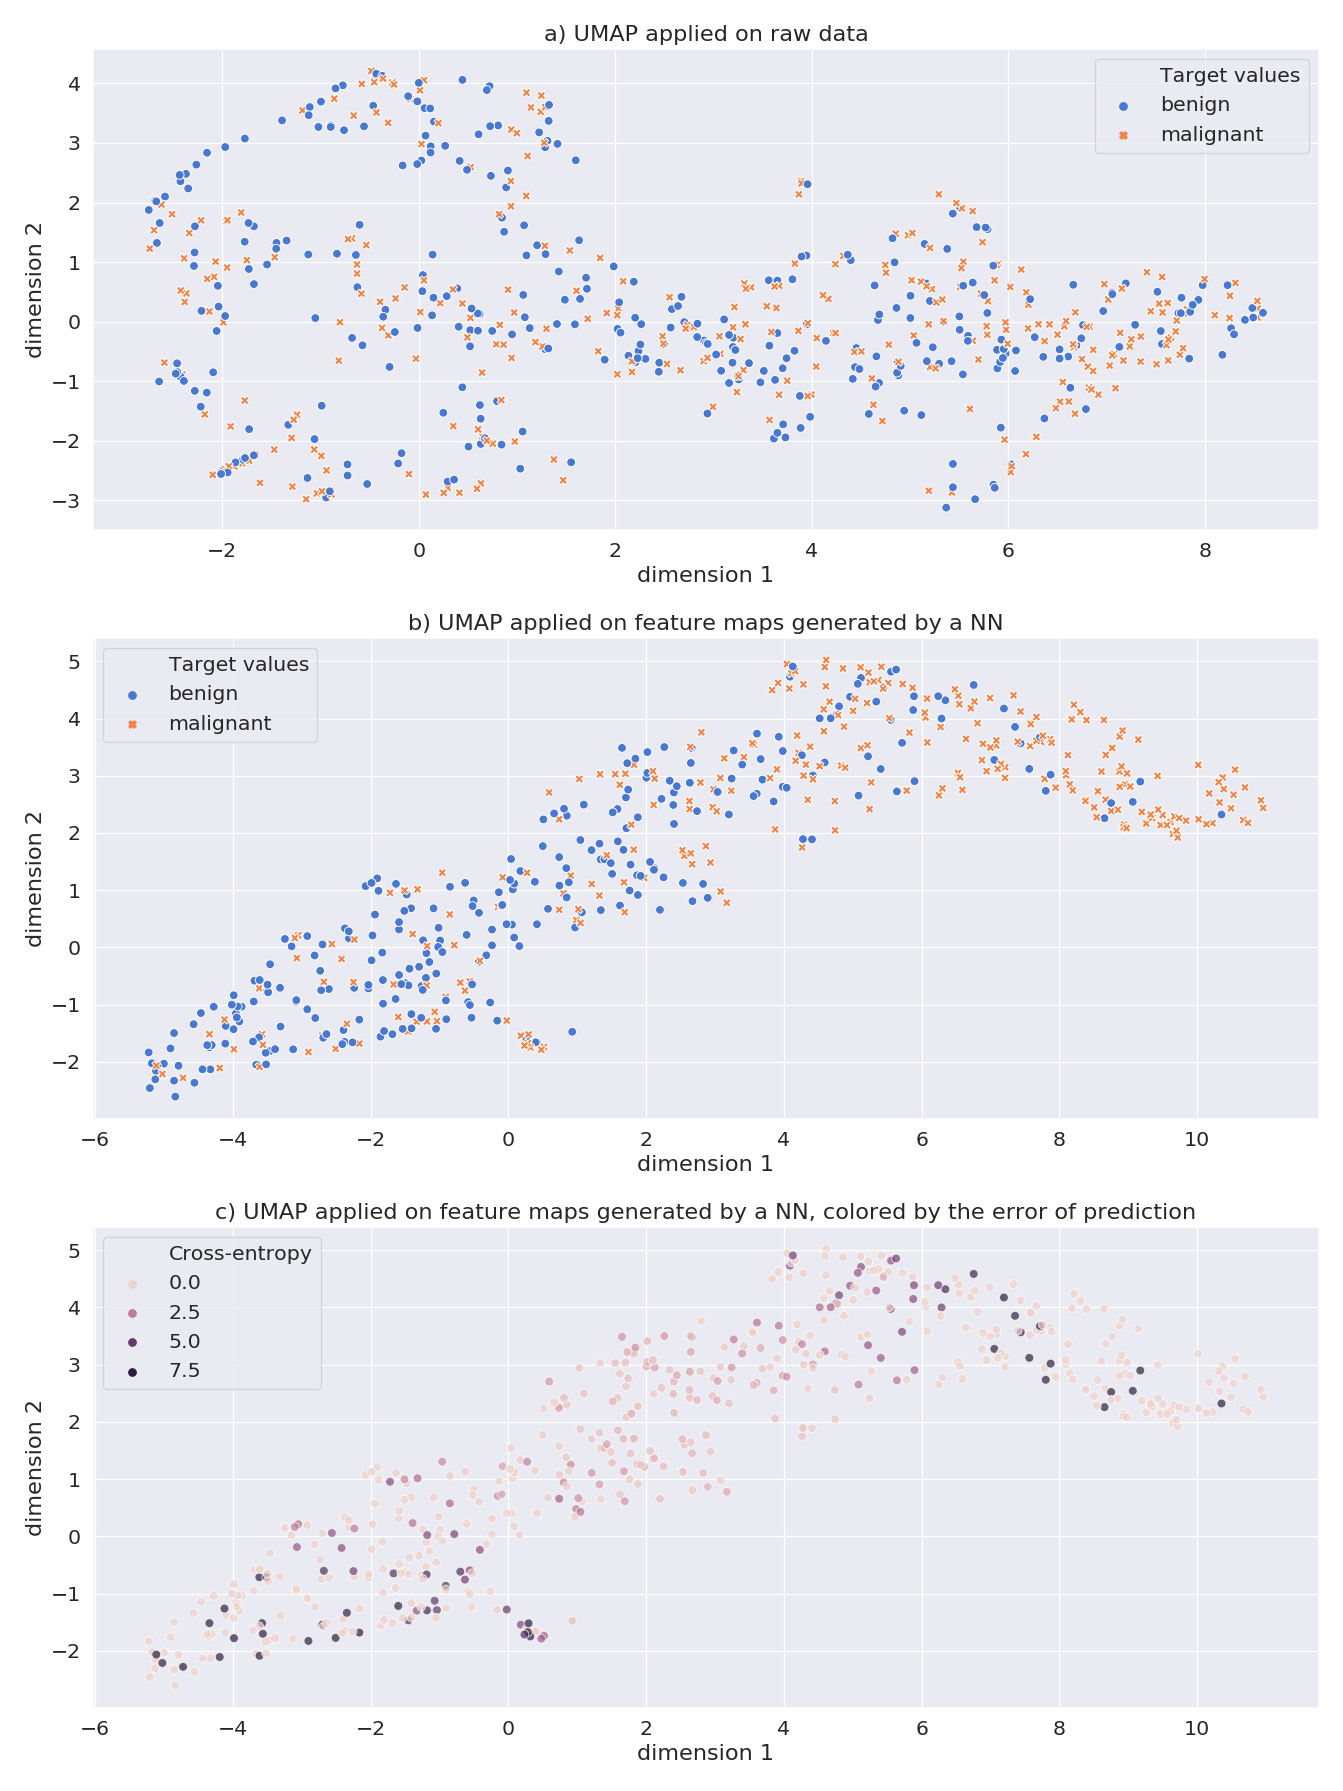

In [204]:
import umap

train_data,       train_targets,       train_predictions,   train_ce      , train_id, train_entr   = get_features_and_targets(selected_storage_train)
test_data,       test_targets,       test_predictions,      test_ce       , test_id  , test_entr  = get_features_and_targets(selected_storage_test)
validation_data, validation_targets, validation_predictions,validation_ce , val_id,  val_entr     = get_features_and_targets(selected_storage_validation)


s = 50

reducer = umap.UMAP(random_state=42, n_components=2)
reducer_features = reducer
# reducer.fit(train_data, train_targets)
# reducer.fit(test_data)#, test_targets)
reducer.fit(np.concatenate([validation_data, test_data]), np.concatenate([validation_targets, [-1]*len(test_data)]).astype(np.int8))
# reducer.fit(train_data, train_targets.astype(np.int8))
# reducer.fit(np.concatenate([train_data, test_data]), np.concatenate([train_targets, [-1]*len(test_data)]).astype(np.int8))

# UMAP(a=1.576943460405378, alpha=1.0, angular_rp_forest=False,
#    b=0.8950608781227859, bandwidth=1.0, gamma=1.0, init='spectral',
#    local_connectivity=1.0, metric='euclidean', metric_kwds={},
#    min_dist=0.1, n_components=2, n_epochs=None, n_neighbors=15,
#    negative_sample_rate=5, random_state=42, set_op_mix_ratio=1.0,
#    spread=1.0, target_metric='categorical', target_metric_kwds={},
#    transform_queue_size=4.0, transform_seed=42, verbose=False)


# Generate UMAP embeddings

print('1')
val_emb = reducer.transform(validation_data) 
print('2')
test_emb = reducer.transform(test_data)
print('3')
train_emb = reducer.transform(train_data) 

import matplotlib.cm as cm
import seaborn as sns

# embedding = val_emb
# targets = validation_targets
# predictions = validation_predictions
# correctness = np.argmax(validation_predictions, axis=1) == targets


# embedding = train_emb
# targets = train_targets
# predictions = train_predictions
# correctness = np.argmax(predictions, axis=1) == targets


embedding = test_emb
targets = test_targets
predictions = test_predictions
correctness = np.argmax(predictions, axis=1) == targets
correctness = np.clip(test_ce, 0, np.percentile(test_ce, 95))  
# correctness = test_ce



# correctness = predictions[range(len(targets)), np.ix_(targets)][0,:]
# correctness = correctness - np.percentile(correctness, 7)
# correctness = (correctness / np.percentile(correctness, 93))
# correctness = np.clip(correctness, 0, 1)

visualize_data = embedding

visualize_target = correctness
visualize_target_2 = targets
visualize_target_3 = np.argmax(predictions, axis=1)

# visualize_target = storage_dict[for_loader][4][:]
# visualize_target_2 = res
# # visualize_target_3 = np.argmax(storage_dict[for_loader][0][:], axis=1)
# visualize_target_3 = ress.mean(axis=0) <= 3/8


fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_size_inches(15, 20, forward=True)  
# plt.rcParams.update({'font.size': 50})
sns.set(font_scale=1.5)  


ax = fig.add_subplot(3,1,3)

ax.title.set_text('c) UMAP applied on feature maps generated by a NN, colored by the error of prediction')

c = visualize_target
# im = ax.scatter(visualize_data[:,0], visualize_data[:,1], c=c, label=c, s=10, alpha=0.8, cmap='Oranges')
# legend1 = ax.legend(*im.legend_elements(),
#                     loc="upper right", title="Cross-entropy")
df = pd.DataFrame(visualize_data, columns = ['dimension 1','dimension 2'])
df['Cross-entropy'] = c
sns.scatterplot(ax=ax, x='dimension 1', y='dimension 2', hue='Cross-entropy' , alpha=0.7, s=s, cmap='Oranges', data=df)


ax = fig.add_subplot(3,1,2)
ax.title.set_text('b) UMAP applied on feature maps generated by a NN')

c = visualize_target_2
# g =sns.scatterplot(ax=ax, x=visualize_data[:,0], y=visualize_data[:,1], style=c, hue=c)
# leg = ax.get_legend()
# leg.set_title("Target class")
# im = ax.scatter(visualize_data[:,0], visualize_data[:,1], style=c, label=c, s=10, alpha=1.0, cmap='Spectral', picker=True)
# ax.set_facecolor('xkcd:navy blue')
# legend2 = ax.legend(*im.legend_elements(),
#                     loc="lower left", title="Target class")
# c = visualize_target // 2
lab = ['benign' if v==0 else 'malignant' for v in c]
# im = ax.scatter(visualize_data[:,0], visualize_data[:,1], c=c, label=lab, s=10, alpha=0.8, cmap='rainbow', picker=True)
# im = ax.scatter(visualize_data[:,0], visualize_data[:,1], c=c, label=c, s=10, alpha=0.8, cmap='rainbow', picker=True)
# ax.set_facecolor('xkcd:navy blue')
df = pd.DataFrame(visualize_data, columns = ['dimension 1','dimension 2'])
df['Target values'] = lab
sns.scatterplot(ax=ax, x='dimension 1', y='dimension 2', hue='Target values' ,style='Target values', s=s, alpha=1, palette="muted", data=df)
df_real_images = df



ax = fig.add_subplot(3,1,1)
ax.title.set_text('a) UMAP applied on raw data')


# c = visualize_target_3
# g =sns.scatterplot(ax=ax, x=visualize_data[:,0], y=visualize_data[:,1], style=c, hue=c)
# leg = ax.get_legend()
# leg.set_title("Predicted class")
# # im = ax.scatter(visualize_data[:,0], visualize_data[:,1], style=c, label=c, s=10, alpha=1, cmap='Spectral', picker=True)
# # ax.set_facecolor('xkcd:navy blue')
# # legend3 = ax.legend(*im.legend_elements(),
# #                     loc="lower left", title="Predicted class")

# plt.show()


import numpy as np
import pandas as pd

test_path = '/home/wm/mff/diploma/data/processed/patch_ddsm_cleaned_resized/test_data.npy'
test_path_target = '/home/wm/mff/diploma/data/processed/patch_ddsm_cleaned_resized/test_labels.npy'
test_meta_path = '/home/wm/mff/diploma/data/processed/patch_ddsm_cleaned_resized/test_meta.h5'
meta_df = pd.read_hdf(test_meta_path, 'data')
mm = np.memmap(test_path, dtype='uint8',mode='r', shape=(len(meta_df), 450,450))
mm_targets = np.memmap(test_path_target, dtype='uint8',mode='r', shape=(len(meta_df)))
test_data = mm

train_path = '/home/wm/mff/diploma/data/processed/patch_ddsm_cleaned_resized/train_data.npy'
train_path_target = '/home/wm/mff/diploma/data/processed/patch_ddsm_cleaned_resized/train_labels.npy'
train_meta_path = '/home/wm/mff/diploma/data/processed/patch_ddsm_cleaned_resized/train_meta.h5'
train_meta_df = pd.read_hdf(train_meta_path, 'data')
train_mm = np.memmap(train_path, dtype='uint8',mode='r', shape=(len(train_meta_df), 450,450))
train_mm_targets = np.memmap(train_path_target, dtype='uint8',mode='r', shape=(len(train_meta_df)))
train_data = train_mm


import torch
dim = 32
add = torch.nn.AdaptiveMaxPool2d((dim, dim))
train_data = add(torch.from_numpy(train_data).type(torch.DoubleTensor)).cpu().numpy()

test_data_images = test_data

test_data = add(torch.from_numpy(test_data).type(torch.DoubleTensor)).cpu().numpy()

train_data = train_data.reshape(train_data.shape[0], dim*dim)
test_data = test_data.reshape(test_data.shape[0], dim*dim)





train_targets = train_mm_targets
test_targets = mm_targets



import umap

reducer = umap.UMAP(random_state=42, n_components=2, min_dist=0)
# reducer.fit(train_data, train_targets)
# reducer.fit(test_data)#, test_targets)
# reducer.fit(test_data)
reducer.fit(np.concatenate([train_data, test_data]), np.concatenate([train_targets//2, [-1]*len(test_data)]).astype(np.int8))

# UMAP(a=1.576943460405378, alpha=1.0, angular_rp_forest=False,
#    b=0.8950608781227859, bandwidth=1.0, gamma=1.0, init='spectral',
#    local_connectivity=1.0, metric='euclidean', metric_kwds={},
#    min_dist=0.1, n_components=2, n_epochs=None, n_neighbors=15,
#    negative_sample_rate=5, random_state=42, set_op_mix_ratio=1.0,
#    spread=1.0, target_metric='categorical', target_metric_kwds={},
#    transform_queue_size=4.0, transform_seed=42, verbose=False)

# sklearn.ensemble.RandomForestClassifier
# Generate UMAP embeddings

test_emb = reducer.transform(test_data)
train_emb = reducer.transform(train_data)
                       


visualize_data = test_emb

visualize_target = mm_targets



# fig = plt.figure(figsize=plt.figaspect(0.5))
# fig.set_size_inches(10, 10, forward=True)   
# ax = fig.add_subplot(1,1,1)

c = visualize_target // 2
lab = ['benign' if v==0 else 'malignant' for v in c]
# im = ax.scatter(visualize_data[:,0], visualize_data[:,1], c=c, label=lab, s=10, alpha=0.8, cmap='rainbow', picker=True)
# im = ax.scatter(visualize_data[:,0], visualize_data[:,1], c=c, label=c, s=10, alpha=0.8, cmap='rainbow', picker=True)
# ax.set_facecolor('xkcd:navy blue')
df = pd.DataFrame(visualize_data, columns = ['dimension 1','dimension 2'])
df['Target values'] = lab
sns.scatterplot(ax=ax, x='dimension 1', y='dimension 2', hue='Target values', s=s ,style='Target values', alpha=1, palette="muted", data=df)


IMAGE_NAME = 'UMAP.png'
imagepath = os.path.join(SAVE_DIR, IMAGE_NAME)

fig.tight_layout()
# plt.subplots_adjust(left=0.06, right=0.98, top=0.99, bottom=0.05)

plt.savefig(imagepath, dpi=200)

plt.show()


# Trajectories of the adversarials

In [205]:
img_dir = '/home/wm/mff/diploma/TMP/malign_incorrect_examp'
storages = [
'/home/wm/mff/diploma/TMP/malign_incorrect_examp/P_01237|LEFT|CC|mask|calc|BENIGN|0.png.h5',
'/home/wm/mff/diploma/TMP/malign_incorrect_examp/P_00723|LEFT|MLO|mask|calc|BENIGN|0.png.h5',
'/home/wm/mff/diploma/TMP/malign_incorrect_examp/P_01803|RIGHT|MLO|mask|calc|MALIGNANT|0.png.h5',

'/home/wm/mff/diploma/TMP/benign_incorrect_example/P_00979|LEFT|CC|mask|mass|BENIGN|0.png.h5',
'/home/wm/mff/diploma/TMP/benign_incorrect_example/P_01204|RIGHT|MLO|mask|mass|MALIGNANT|0.png.h5',
'/home/wm/mff/diploma/TMP/benign_incorrect_example/P_01617|LEFT|CC|mask|mass|MALIGNANT|0.png.h5',
]



<IPython.core.display.Javascript object>


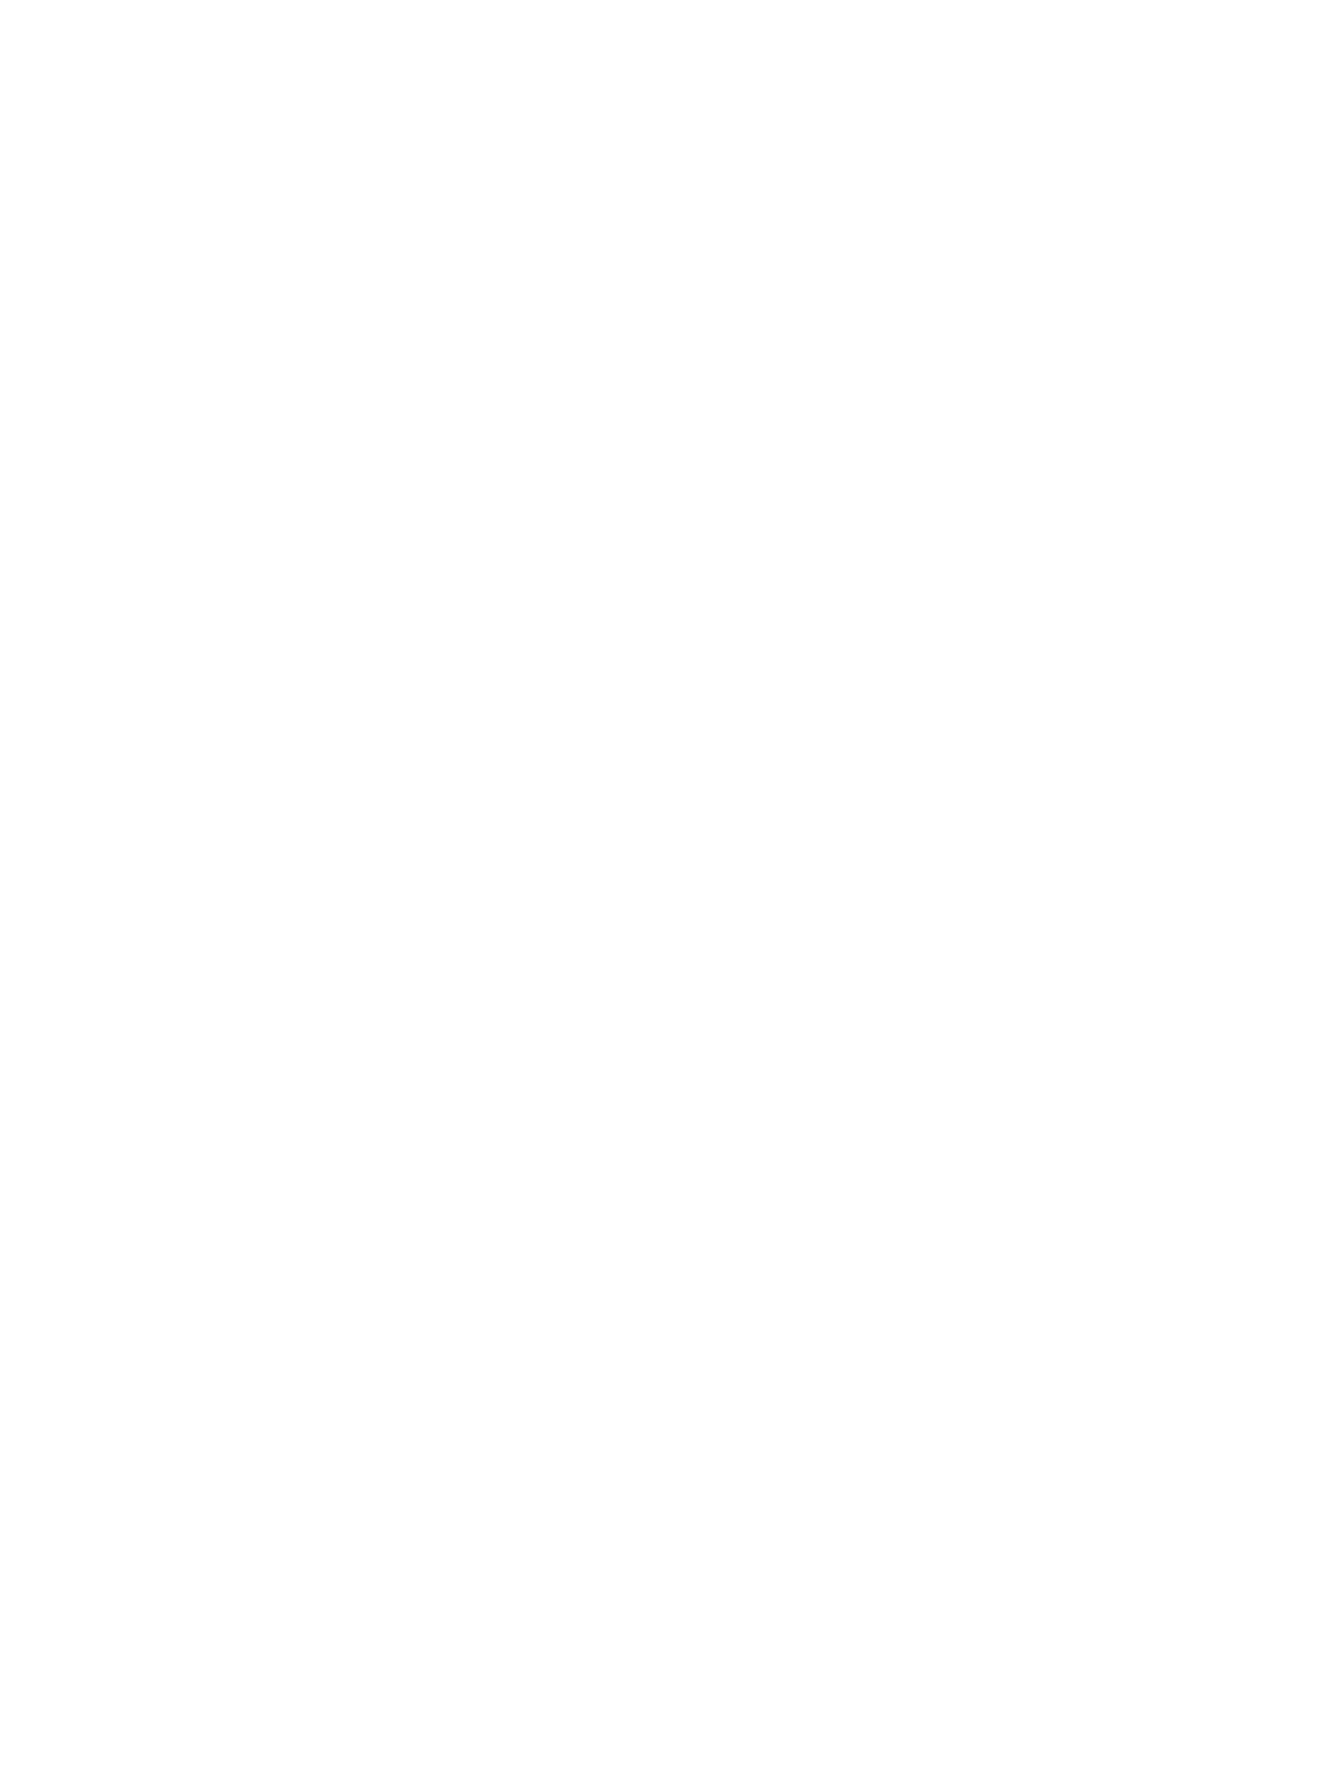

<IPython.core.display.Javascript object>


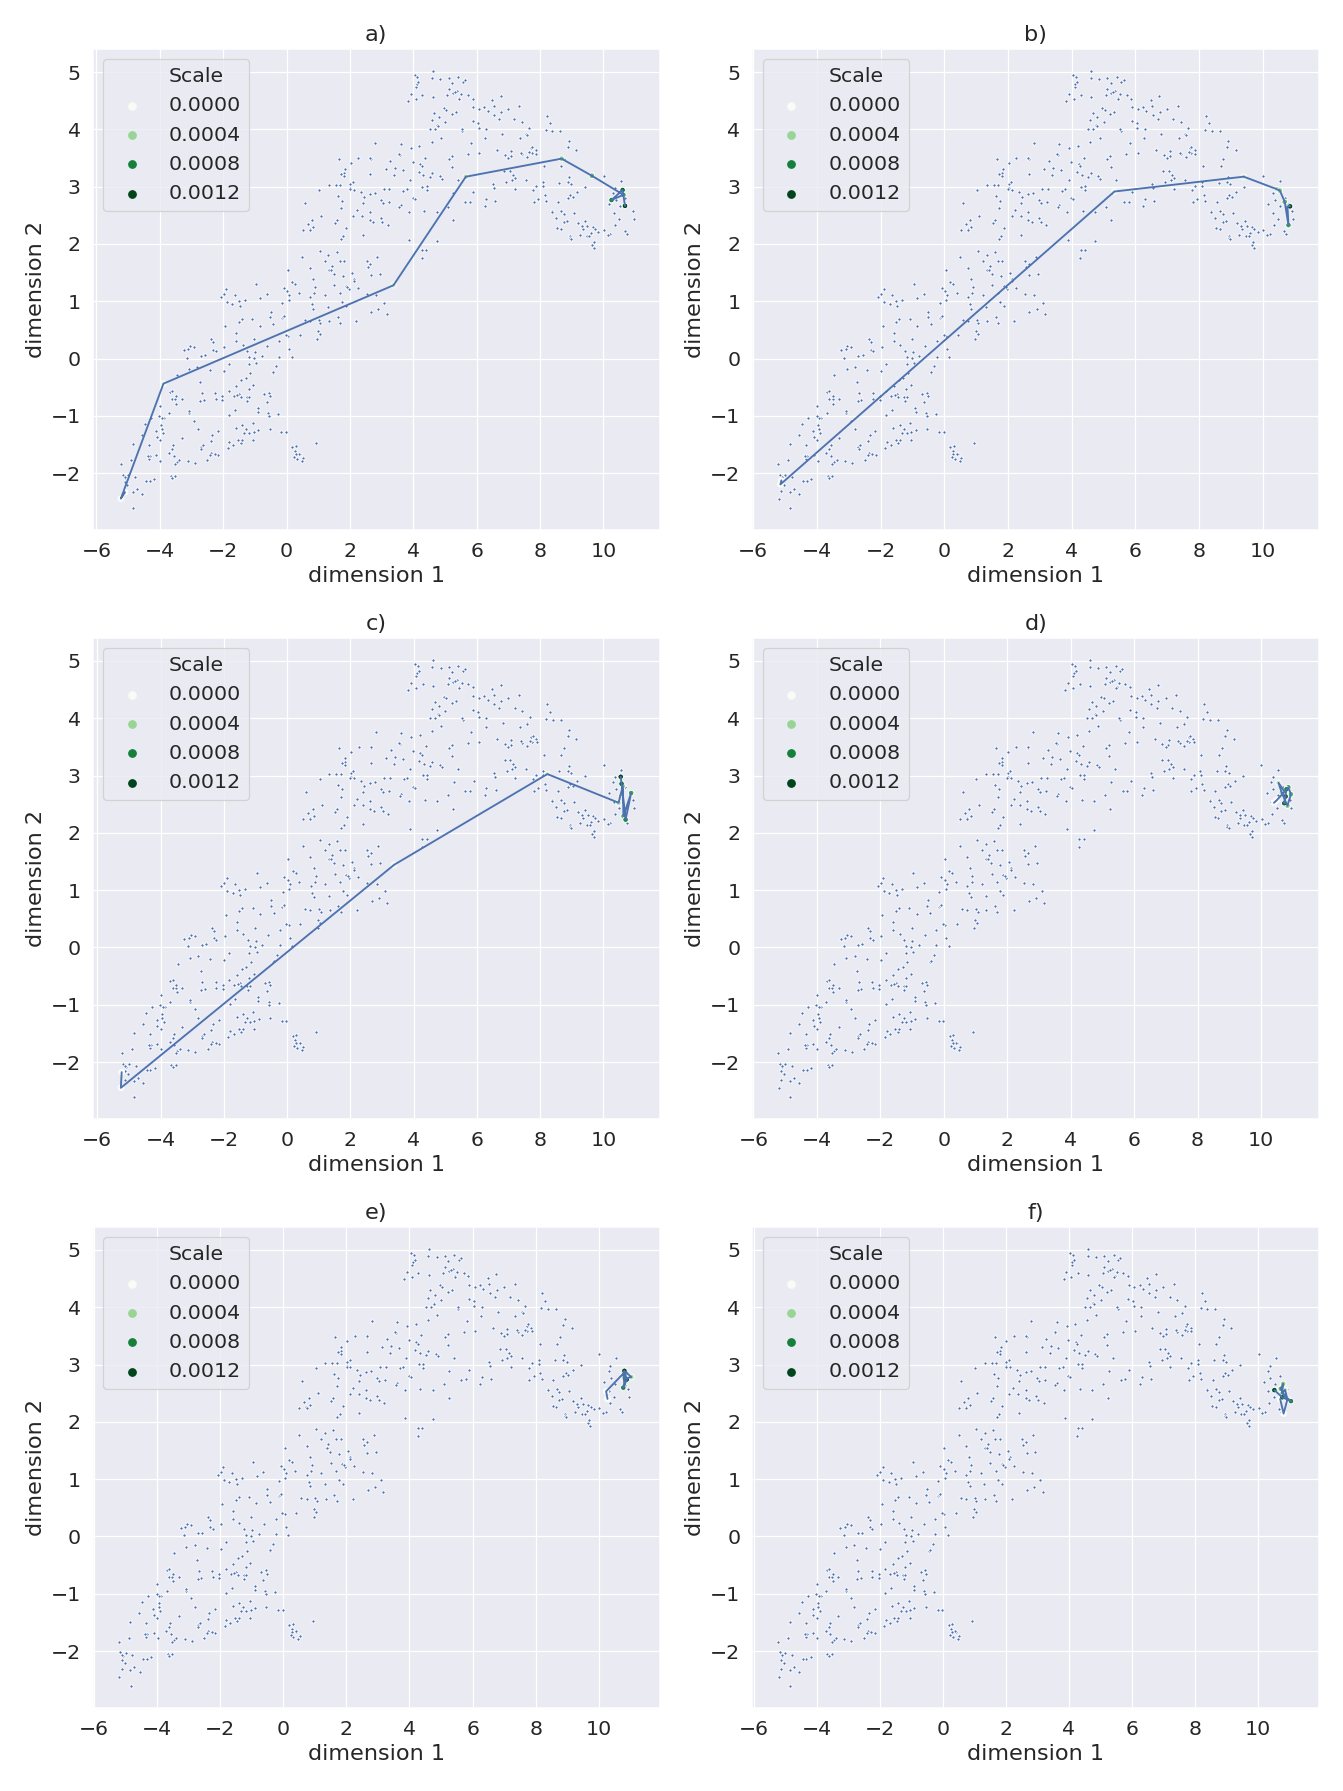

In [208]:

titles = [
    'a)','b)','c)','d)','e)','f)'
]

f_names = ['smaller', 'bigger']

funcs = [lambda a: a<=0, lambda a: a>=0]
for fi, func in enumerate(funcs):
    plt.close()
    fig = plt.figure(figsize=plt.figaspect(0.5))
    fig.set_size_inches(15, 20, forward=True)  
    # plt.rcParams.update({'font.size': 50})
#     sns.set(font_scale=0.8)  
    sns.set(font_scale=1.5)  

    
    for i in range(6):
        ax = fig.add_subplot(3,2,i+1)

        ax.title.set_text(titles[i])

        sns.scatterplot(ax=ax, x='dimension 1', y='dimension 2', alpha=1,s=7,palette='black', data=df_real_images)


        dfs = []
        for s in [storages[i]]:
            df = pd.read_hdf(s)
            df.keys()

            fms = df['feature_map'].values
            fms = np.array([[a] for a in fms]).squeeze()

            adv_emb = reducer_features.transform(fms)


    #         c = df['probability'].values
            c = df['scale'].values
            # legend1 = ax.legend(*im.legend_elements(),
            #                     loc="upper right", title="Cross-entropy")
            df = pd.DataFrame(adv_emb, columns = ['dimension 1','dimension 2'])
            df['Scale'] = c
            df['image']=s
            df = df[func(df['Scale'])]
            dfs.append(df)
            sns.scatterplot(ax=ax, x='dimension 1', y='dimension 2', data=df, palette="Greens", hue='Scale', s=20)
            sns.lineplot(ax=ax, x='dimension 1', y='dimension 2', data=df, sort=False)
            
            #             im = ax.scatter(visualize_data[:,0], visualize_data[:,1], c=c, label=c, s=10, alpha=0.8, cmap='Oranges')
            

        dfs = pd.concat(dfs)
#         sns.scatterplot(ax=ax, x='dimension 1', y='dimension 2', data=dfs, palette='coolwarm', hue='Scale')
#         sns.scatterplot(ax=ax, x='dimension 1', y='dimension 2', data=dfs, palette="Greens", hue='Scale', s=20)

        plt.show()

    IMAGE_NAME = f_names[fi]+ '_adversarial.png'
    imagepath = os.path.join(SAVE_DIR, IMAGE_NAME)

    fig.tight_layout()
    # plt.subplots_adjust(left=0.06, right=0.98, top=0.99, bottom=0.05)

    plt.savefig(imagepath, dpi=200)



In [11]:
def plot_by_id(id_):
#     plt.close()
    test_data_images
    imgplot = plt.imshow(test_data_images[id_,...])
    plt.show()
    
def get_image(id_):
    return test_data_images[id_,...]

In [ ]:
# legend1 = ax.legend(*im.legend_elements(),
#                     loc="upper right", title="Target values")




from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier
from  sklearn.ensemble import RandomForestClassifier
# clf = KNeighborsClassifier(n_neighbors=5)
# clf = svm.SVC()
clf = RandomForestClassifier()


X = train_emb
y = train_targets // 2
clf.fit(X, y)



p = clf.predict(test_emb)

import sklearn
import sklearn.metrics

print(sklearn.metrics.roc_auc_score(test_targets//2, p) )


In [ ]:
import sklearn
import sklearn.metrics

print(sklearn.metrics.roc_auc_score(c, np.percentile(test_data, 100,
                                                     axis=1)))
print(sklearn.metrics.roc_auc_score(c, np.mean(test_data, axis=1)))

# Outliers

In [12]:
get_features_and_targets(selected_storage_test)[-1]

array([6.74841702e-01, 1.73534565e-02, 6.82742357e-01, 2.68392682e-01,
       5.99247277e-01, 7.14239106e-02, 8.08856711e-02, 6.42788351e-01,
       1.61857516e-01, 4.90929455e-01, 3.27124330e-03, 1.16086099e-02,
       1.00933656e-01, 2.39843149e-02, 1.46290064e-02, 6.51709437e-01,
       3.71057093e-02, 6.78991795e-01, 2.64412072e-02, 1.50290594e-01,
       2.23004386e-01, 7.69953802e-02, 2.48814568e-01, 1.73233002e-01,
       2.86277622e-01, 6.88340843e-01, 2.81097144e-01, 4.99531589e-02,
       1.02518171e-01, 2.92059153e-01, 1.11400429e-02, 1.15901639e-03,
       1.14258587e-01, 2.33985499e-01, 2.49228805e-01, 2.64496729e-03,
       1.41311347e-01, 1.57851756e-01, 4.71491925e-03, 6.92383468e-01,
       4.62103188e-02, 1.18788693e-03, 2.02129290e-01, 2.34877551e-03,
       1.95682351e-05, 1.11725911e-01, 6.58254147e-01, 4.82517714e-03,
       1.79993905e-04, 4.52350199e-01, 6.88515365e-01, 3.00191700e-01,
       8.30323435e-03, 7.69163445e-02, 2.90264189e-01, 2.95029104e-01,
      

In [13]:
import umap

train_data,       train_targets,       train_predictions,   train_ce      , train_id, train_entr   = get_features_and_targets(selected_storage_train)
test_data,       test_targets,       test_predictions,      test_ce       , test_id  , test_entr  = get_features_and_targets(selected_storage_test)
validation_data, validation_targets, validation_predictions,validation_ce , val_id,  val_entr     = get_features_and_targets(selected_storage_validation)


s = 50

reducer = umap.UMAP(random_state=42, n_components=2)
# reducer.fit(train_data, train_targets)
# reducer.fit(test_data)#, test_targets)
reducer.fit(np.concatenate([validation_data, test_data]), np.concatenate([validation_targets, [-1]*len(test_data)]).astype(np.int8))
# reducer.fit(np.concatenate([train_data, test_data]), np.concatenate([train_targets, [-1]*len(test_data)]).astype(np.int8))

# UMAP(a=1.576943460405378, alpha=1.0, angular_rp_forest=False,
#    b=0.8950608781227859, bandwidth=1.0, gamma=1.0, init='spectral',
#    local_connectivity=1.0, metric='euclidean', metric_kwds={},
#    min_dist=0.1, n_components=2, n_epochs=None, n_neighbors=15,
#    negative_sample_rate=5, random_state=42, set_op_mix_ratio=1.0,
#    spread=1.0, target_metric='categorical', target_metric_kwds={},
#    transform_queue_size=4.0, transform_seed=42, verbose=False)


# Generate UMAP embeddings

print('1')
val_emb = reducer.transform(validation_data) 
print('2')
test_emb = reducer.transform(test_data)
print('3')
train_emb = reducer.transform(train_data) 

import matplotlib.cm as cm
import seaborn as sns

# embedding = val_emb
# targets = validation_targets
# predictions = validation_predictions
# correctness = np.argmax(validation_predictions, axis=1) == targets


# embedding = train_emb
# targets = train_targets
# predictions = train_predictions
# correctness = np.argmax(predictions, axis=1) == targets


embedding = test_emb
targets = test_targets
predictions = test_predictions
correctness = np.argmax(predictions, axis=1) == targets
correctness = np.clip(test_ce, 0, np.percentile(test_ce, 95))  
# correctness = test_ce



import umap
ax.set_yscale('log')

s = 50

reducer = umap.UMAP(random_state=42, n_components=2)
# reducer.fit(train_data, train_targets)
reducer.fit(test_data)#, test_targets)
# reducer.fit(np.concatenate([validation_data, test_data]), np.concatenate([validation_targets, [-1]*len(test_data)]).astype(np.int8))
# reducer.fit(np.concatenate([train_data, test_data]), np.concatenate([train_targets, [-1]*len(test_data)]).astype(np.int8))

# UMAP(a=1.576943460405378, alpha=1.0, angular_rp_forest=False,
#    b=0.8950608781227859, bandwidth=1.0, gamma=1.0, init='spectral',
#    local_connectivity=1.0, metric='euclidean', metric_kwds={},
#    min_dist=0.1, n_components=2, n_epochs=None, n_neighbors=15,
#    negative_sample_rate=5, random_state=42, set_op_mix_ratio=1.0,
#    spread=1.0, target_metric='categorical', target_metric_kwds={},
#    transform_queue_size=4.0, transform_seed=42, verbose=False)


# Generate UMAP embeddings

print('1')
val_emb = reducer.transform(validation_data) 
print('2')
test_emb = reducer.transform(test_data)
print('3')
# train_emb = reducer.transform(train_data) 




embedding = test_emb
targets = test_targets
predictions = test_predictions
correctness = np.argmax(predictions, axis=1) == targets
correctness = test_ce #np.clip(test_ce, 0, np.percentile(test_ce, 95))  

visualize_data = test_emb

1
2
3
1
2
3


now visualizing scatterlplot...


<IPython.core.display.Javascript object>


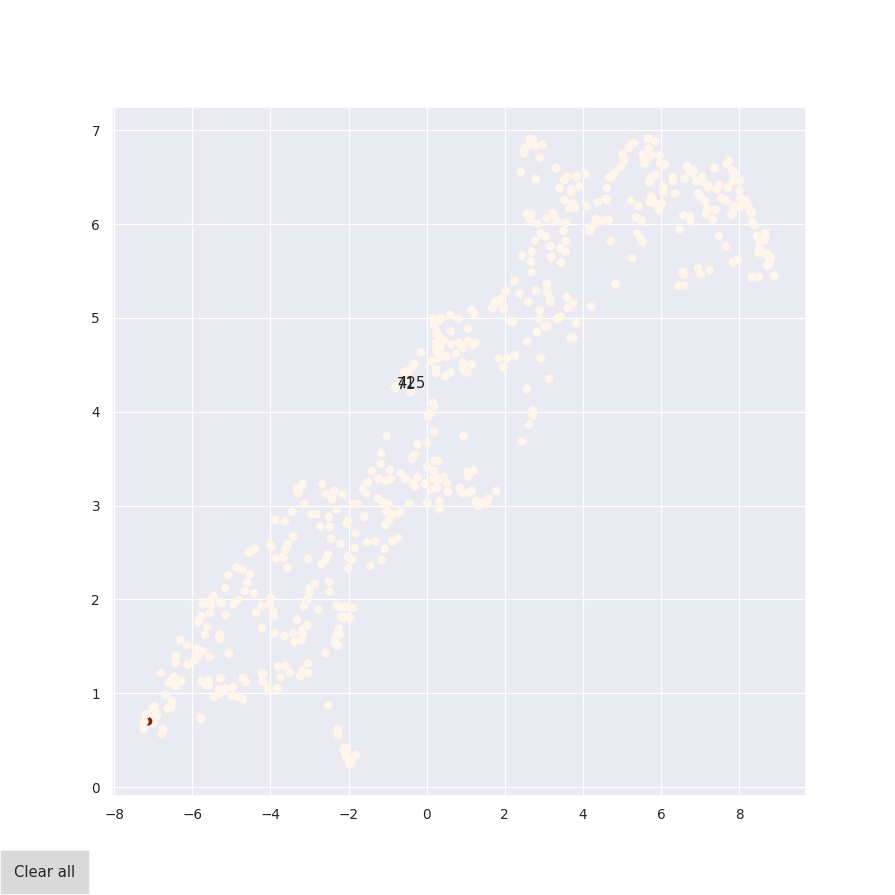

scatterplot done


In [14]:
ID_TO_FIND = 215
USE_ID_AS_COLOR = True

# import the main drawing library
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib.text import Annotation

# import the seaborn module which is based on matplotlib to make our visualization more presentable
import seaborn as sns

# set the default style
sns.set()

# define two colors, just to enrich the example
# labels_color_map = get_entropy{0: '#20b2aa', 1: '#ff7373'}

# set the examples count

# generate the data needed for the scatterplot
generated_data = zip(visualize_data[:,0], visualize_data[:,1])
generated_labels = [str(i) for i in test_id]
# generated_labels = test_id

print("now visualizing scatterlplot...")

# add the values one by one to the scatterplot
instances_colors = []
axis_values_x = []
axis_values_y = []
for index, instance in enumerate(generated_data):
    # print instance, index, labels[index]
    coordinate_x, coordinate_y = instance

    if USE_ID_AS_COLOR:
        #COLOR BY ID
        instances_colors.append(index==ID_TO_FIND)
    else:
        #COLOR BY CROSS ENTROPY
        instances_colors.append(correctness[index])
    axis_values_x.append(coordinate_x)
    axis_values_y.append(coordinate_y)

# draw a scatter-plot of the generated values
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()


# extract the scatterplot drawing in a separate function so we ca re-use the code
def draw_scatterplot():
    ax.scatter(
        axis_values_x,
        axis_values_y,
        c=instances_colors,
        picker=True,
        cmap='Oranges',
    )


# draw the initial scatterplot
draw_scatterplot()


# create and add an annotation object (a text label)
def annotate(axis, text, x, y):
    text_annotation = Annotation(text, xy=(x, y), xycoords='data')
    axis.add_artist(text_annotation)

arr_of_selected = []
# define the behaviour -> what happens when you pick a dot on the scatterplot by clicking close to it
def onpick(event):
    print('CLICKED')
    try:
        # step 1: take the index of the dot which was picked
        ind = event.ind

        # step 2: save the actual coordinates of the click, so we can position the text label properly
        label_pos_x = event.mouseevent.xdata
        label_pos_y = event.mouseevent.ydata

        # just in case two dots are very close, this offset will help the labels not appear one on top of each other
        offset = 0

        # if the dots are to close one to another, a list of dots clicked is returned by the matplotlib library
        for i in ind:
            # step 3: take the label for the corresponding instance of the data
            label = generated_labels[i]
            arr_of_selected.append(label)

            # step 4: log it for debugging purposes
            print("index", i, label)

            # step 5: create and add the text annotation to the scatterplot
            annotate(
                ax,
                label,
                label_pos_x + offset,
                label_pos_y + offset
            )

            # step 6: force re-draw
            ax.figure.canvas.draw_idle()

            # alter the offset just in case there are more than one dots affected by the click
            offset += 0.01
    except Exception as e:
        print(e)
            


# connect the click handler function to the scatterplot
fig.canvas.mpl_connect('pick_event', onpick)

# create the "clear all" button, and place it somewhere on the screen
ax_clear_all = plt.axes([0.0, 0.0, 0.1, 0.05])
button_clear_all = Button(ax_clear_all, 'Clear all')


# define the "clear all" behaviour
def onclick(event):
    # step 1: we clear all artist object of the scatter plot
    ax.cla()

    # step 2: we re-populate the scatterplot only with the dots not the labels
    draw_scatterplot()

    # step 3: we force re-draw
    ax.figure.canvas.draw_idle()


# link the event handler function to the click event on the button
button_clear_all.on_clicked(onclick)

# initial drawing of the scatterplot
plt.plot()
print("scatterplot done")

# present the scatterplot
plt.show()



In [15]:
test_meta_path = '/home/wm/mff/diploma/data/processed/patch_ddsm_cleaned_resized/test_meta.h5'
meta_df = pd.read_hdf(test_meta_path, 'data')

test_ids = pd.read_csv('/home/wm/mff/diploma/models/ANALYSIS_FOLDS_NEW_2/run_number:6-data%model_name:6.checkpoint/test_ids', lineterminator=',', header=None)[0].values

mf = meta_df.iloc[test_ids].reset_index()
mf['old_index'] = mf['index']
mf = mf.drop(columns=['index'])
selected_storage_test.metafeatures = mf


ttt = selected_storage_test.merge_with_metafeatures(selected_storage_test.get_targets())
ttt['ce'] = test_ce

ttt['entropy'] = selected_storage_test.get_entropy()['entropy']

arr_of_selected_int = [int(a) for a in arr_of_selected]
selected_patterns = ttt[ttt['id'].apply(lambda id_: id_ in arr_of_selected_int)]
selected_pattern_ids = selected_patterns['old_index'].values
# np.unique(ttt['assessment'].values)



In [37]:
mf['old_index']

0        0
1        1
2        2
3        3
4        4
      ... 
539    613
540    626
541    627
542    630
543    631
Name: old_index, Length: 544, dtype: int64

In [35]:
pd.read_csv('/home/wm/mff/diploma/models/ANALYSIS_FOLDS_NEW_2/run_number:6-data%model_name:6.checkpoint/test_ids', lineterminator=',', header=None)


0
0      0
1      1
2      2
3      3
4      4
..   ...
539  613
540  626
541  627
542  630
543  631

[544 rows x 1 columns]

In [21]:
pattern_row.columns

Index(['target', 'id', 'index', 'ROI_mask_file_path', 'abnormality_id',
       'abnormality_type', 'assessment', 'breast_density', 'calc_distribution',
       'calc_type', 'case_dir', 'cropped_image_file_path',
       'data_set_original_type', 'image_file_path', 'image_view',
       'left_or_right_breast', 'mask_name', 'mass_margins', 'mass_shape',
       'pathology', 'patient_id', 'subtlety', 'is_test', 'new_labels',
       'old_index', 'ce', 'entropy'],
      dtype='object')

<IPython.core.display.Javascript object>


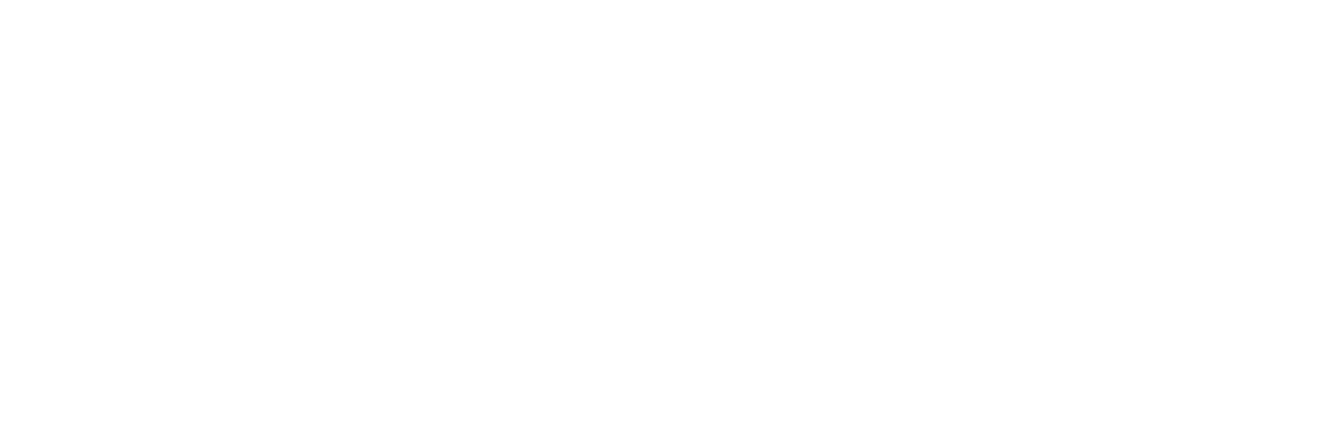

<IPython.core.display.Javascript object>


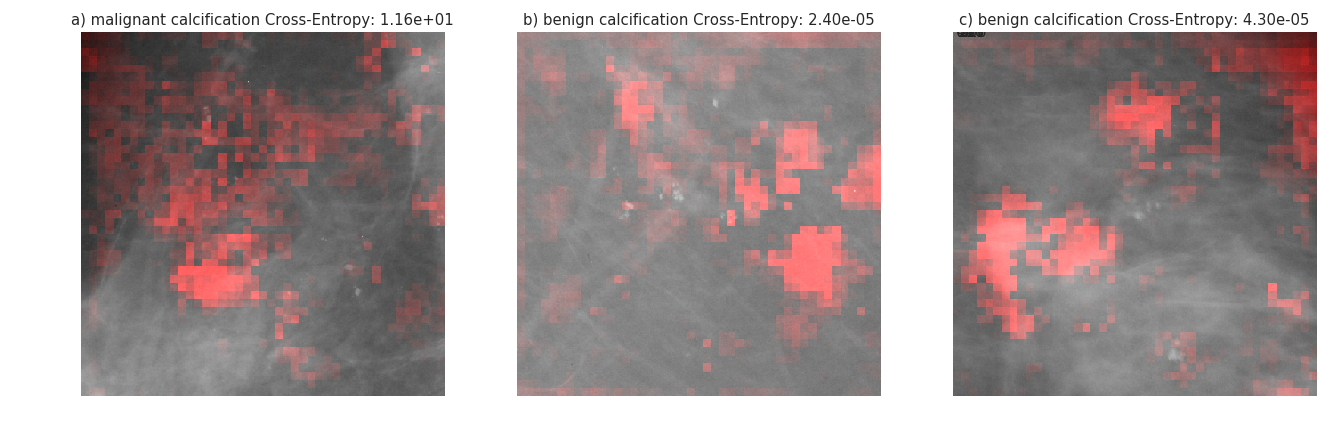

(480, 480, 4)
(480, 480, 4)
(480, 480, 4)


In [69]:
# Biggest error on benign
image_ids = [215, 137, 81]


image_names = []
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_size_inches(5*len(image_ids),5, forward=True)  
l = ['a)','b)','c)']

for i, f in enumerate(image_ids):
    ax = fig.add_subplot(1, len(image_ids),i+1)
    pattern_row = ttt[ttt['id']==int(f)]
    image_name = ' '.join([
#             str(pattern_row['patient_id'].values[0]), str(pattern_row['mask_name'].values[0]),str(pattern_row['left_or_right_breast'].values[0]), str(pattern_row['image_view'].values[0]), 
#             '{:.2e}'.format(abs(pattern_row['ce'].values[0]))]))
       
# for thesis:            
            l[i],
            pattern_row['pathology'].values[0].lower(), pattern_row['abnormality_type'].values[0],
#             'BI-RADS:', str(pattern_row['assessment'].values[0]), 
#             'ID:',str(int(f)),
            'Cross-Entropy:','{:.2e}'.format(abs(pattern_row['ce'].values[0]))])
    
    ax.title.set_text(image_name)
    image_names.append(image_name)
    ax.imshow(get_image(int(pattern_row['old_index'])))
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

IMAGE_NAME = 'error_benign.png'
imagepath = os.path.join(SAVE_DIR, IMAGE_NAME)

fig.tight_layout()
# plt.subplots_adjust(left=0.06, right=0.98, top=0.99, bottom=0.05)

plt.savefig(imagepath, dpi=200)
plt.show()
plt.close()


fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_size_inches(5*len(image_ids),5, forward=True)  


img_pathes = [
SAVE_DIR+'/malignant/P_01803|RIGHT|MLO|mask|calc|MALIGNANT|0.pngmodified_plus_origin.png',
SAVE_DIR+'/malignant/P_01237|LEFT|CC|mask|calc|BENIGN|0.pngmodified_plus_origin.png',
SAVE_DIR+'/malignant/P_00723|LEFT|MLO|mask|calc|BENIGN|0.pngmodified_plus_origin.png',
]


            
for i, f in enumerate(image_ids):
    ax = fig.add_subplot(1, len(image_ids),i+1)
    pattern_row = ttt[ttt['id']==int(f)]
    ax.title.set_text(image_names[i])   
            
    image = np.asarray(Image.open(img_pathes[i]))
    ax.imshow(image[:,:,:3])
    print(image.shape)
#     ax.imshow(get_image(int(f)))
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

IMAGE_NAME = 'error_benign_occluded.png'
imagepath = os.path.join(SAVE_DIR, IMAGE_NAME)

# fig.tight_layout()
plt.subplots_adjust(left=0.06, right=0.98, top=0.99, bottom=0.05)

plt.savefig(imagepath, dpi=200)

<IPython.core.display.Javascript object>


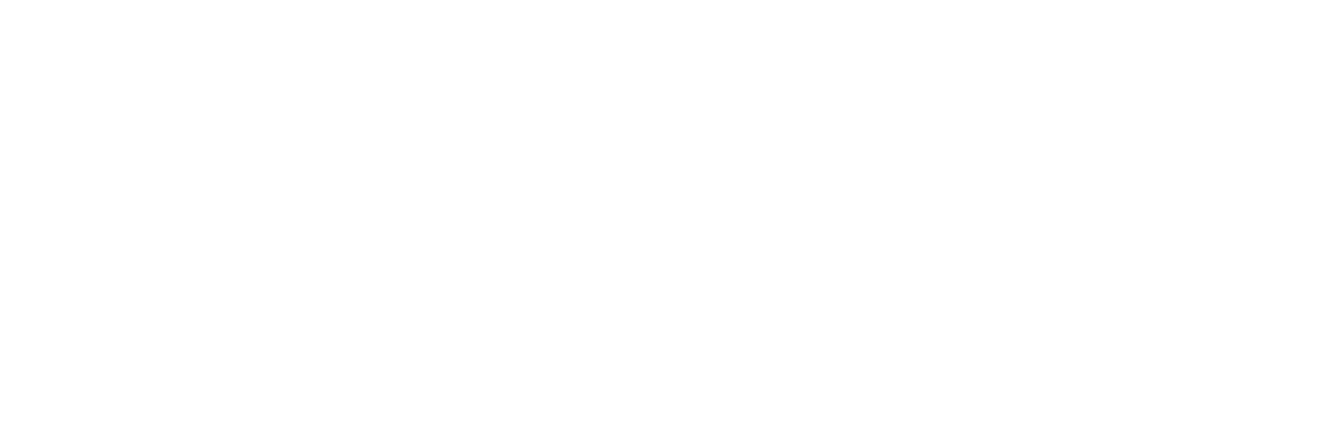

<IPython.core.display.Javascript object>


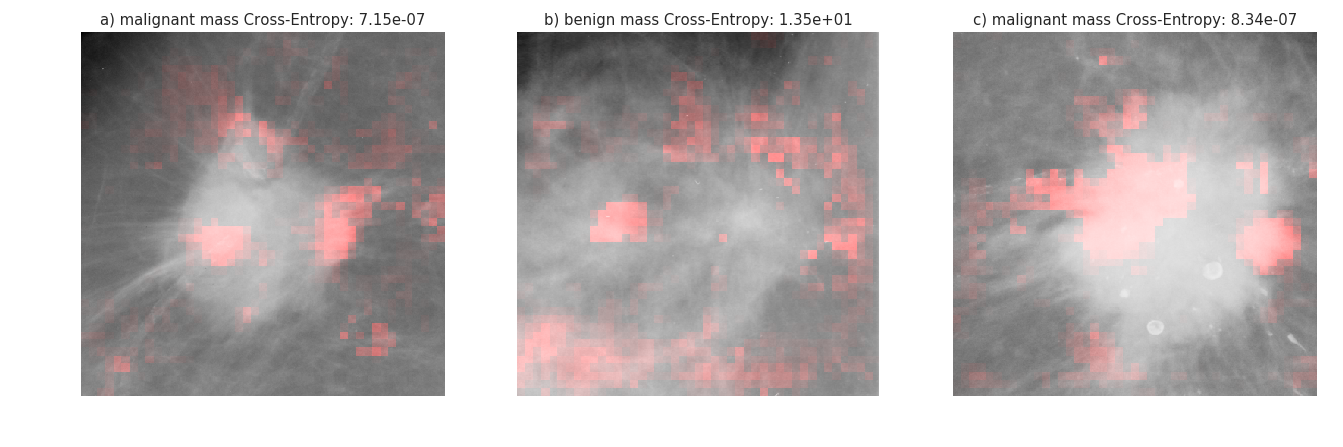

(480, 480, 4)
(480, 480, 4)
(480, 480, 4)


In [66]:
from PIL import Image

# Biggest error on malignant
image_ids = [477, 439, 517]

fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_size_inches(5*len(image_ids),5, forward=True)  
l = ['a)','b)','c)']

image_names = []

for i, f in enumerate(image_ids):
    ax = fig.add_subplot(1, len(image_ids),i+1)
    pattern_row = ttt[ttt['id']==int(f)]
    
    image_name = ' '.join([
#             str(pattern_row['patient_id'].values[0]), str(pattern_row['mask_name'].values[0]),str(pattern_row['left_or_right_breast'].values[0]), str(pattern_row['image_view'].values[0]), 
#             '{:.2e}'.format(abs(pattern_row['ce'].values[0]))]))
       
# for thesis:            
            l[i],
            pattern_row['pathology'].values[0].lower(), pattern_row['abnormality_type'].values[0],
#             'BI-RADS:', str(pattern_row['assessment'].values[0]),'ID:',str(int(f)),
            'Cross-Entropy:','{:.2e}'.format(abs(pattern_row['ce'].values[0]))])
    
    image_names.append(image_name)
    ax.title.set_text(image_name)
    
    ax.imshow(get_image(int(pattern_row['old_index'])))
#     ax.imshow(get_image(int(f)))
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()
IMAGE_NAME = 'error_malignant.png'
imagepath = os.path.join(SAVE_DIR, IMAGE_NAME)
fig.tight_layout()
# plt.subplots_adjust(left=0.06, right=0.98, top=0.99, bottom=0.05)
plt.savefig(imagepath, dpi=200)
plt.close()






fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_size_inches(5*len(image_ids),5, forward=True)  

img_pathes = [
SAVE_DIR+'/benign/P_01204|RIGHT|MLO|mask|mass|MALIGNANT|0.pngmodified_plus_origin.png',
SAVE_DIR+'/benign/P_00979|LEFT|CC|mask|mass|BENIGN|0.pngmodified_plus_origin.png',
SAVE_DIR+'/benign/P_01617|LEFT|CC|mask|mass|MALIGNANT|0.pngmodified_plus_origin.png',
]
            
for i, f in enumerate(image_ids):
    ax = fig.add_subplot(1, len(image_ids),i+1)
    pattern_row = ttt[ttt['id']==int(f)]
    ax.title.set_text(image_names[i])   
            
    image = np.asarray(Image.open(img_pathes[i]))
    ax.imshow(image[:,:,:3])
    print(image.shape)
#     ax.imshow(get_image(int(f)))
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

IMAGE_NAME = 'error_malignant_occluded.png'
imagepath = os.path.join(SAVE_DIR, IMAGE_NAME)

# fig.tight_layout()
plt.subplots_adjust(left=0.06, right=0.98, top=0.99, bottom=0.05)

plt.savefig(imagepath, dpi=200)
            

In [57]:
image[:,:,:3].shape

(480, 480, 3)

# Metafeatures

In [ ]:
len(ttt), len(test_ids), len(test_ce)

ttt.columns

In [ ]:
only_unmodified = True


# selected_storage_train: Storage = all_storages['train'][0]
# selected_storage_test: Storage = all_storages['test'][0]
# selected_storage_validation: Storage = all_storages['validation'][0]    
dfs = []
for selected_storage_train, selected_storage_test, selected_storage_validation in zip(all_storages['train'], all_storages['test'], all_storages['validation']):
#     train_data,       train_targets,       train_predictions,   train_ce      , train_id, train_entr   = get_features_and_targets(selected_storage_train)
#     test_data,       test_targets,       test_predictions,      test_ce       , test_id  , test_entr  = get_features_and_targets(selected_storage_test)
#     validation_data, validation_targets, validation_predictions,validation_ce , val_id,  val_entr     = get_features_and_targets(selected_storage_validation)

#     train_data,       train_targets,       train_predictions,   train_ce      , train_id, train_entr   = get_features_and_targets(selected_storage_train, False)
#     test_data,       test_targets,       test_predictions,      test_ce       , test_id  , test_entr  = get_features_and_targets(selected_storage_test, False)
#     validation_data, validation_targets, validation_predictions,validation_ce , val_id,  val_entr     = get_features_and_targets(selected_storage_validation, False)

    
    
    test_meta_path = '/home/wm/mff/diploma/data/processed/patch_ddsm_cleaned_resized/test_meta.h5'
    meta_df = pd.read_hdf(test_meta_path, 'data')
    
    test_ids_path = selected_storage_test.storage_path[:-len('testpredictions.h5')]
    test_ids = pd.read_csv(test_ids_path + 'test_ids', lineterminator=',', header=None)[0].values

    mf = meta_df.iloc[test_ids].reset_index()
    mf['old_index'] = mf['index']
    mf = mf.drop(columns=['index'])

    
    selected_storage_test.metafeatures = mf


    ttt = selected_storage_test.merge_with_metafeatures(selected_storage_test.get_cross_entropy())
    ttt['ce'] = selected_storage_test._get_cross_entropy(selected_storage_test.get_unmodified_predictions())['cross_entropy']
#     test_ce

    ttt['entropy'] = selected_storage_test.get_entropy()['entropy']

    # plt.close()
    
    
    if only_unmodified:
        mask =  (ttt[TestTimeAugmentations.FLIP_VERTICALLY] == 0) & (ttt[TestTimeAugmentations.ROTATE_90] == 0) # (ttt[TestTimeAugmentations.FLIP_HORIZONTALLY] == 0) &
    
    
    dfs.append(ttt[mask])
    
plt.figure()    
data = pd.concat(dfs)#[['ce', 'entropy', 'assessment']]

print(np.unique(data['assessment'].values,return_counts=True))

for a in range(6):
    data['assessment'+str(a)] = data['assessment']==a
# data = data.drop(columns=['assessment'])
corr = data.corr(method='kendall')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




In [ ]:
data[data['assessment4']]['target'].mean()

In [ ]:
import scipy
data_main = data

num_patt = len(data_main) // 9
print(num_patt)
for i in range(9):
    data = data_main[num_patt*i:(num_patt)*(1+i)]
    print(len(data))
    print(scipy.stats.spearmanr(data['ce'], (data['assessment0'])))
    print(scipy.stats.spearmanr(data['ce'], (data['assessment1'])))
    print(scipy.stats.spearmanr(data['ce'], (data['assessment2'])))
    print(scipy.stats.spearmanr(data['ce'], (data['assessment3'])))
    print(scipy.stats.spearmanr(data['ce'], (data['assessment4'])))
    print(scipy.stats.spearmanr(data['ce'], (data['assessment5'])))

    # all(data['target'] == (data['pathology']=='MALIGNANT'))
data = data_main

print()
print(len(data))
print(scipy.stats.spearmanr(data['ce'], (data['assessment0'])))
print(scipy.stats.spearmanr(data['ce'], (data['assessment1'])))
print(scipy.stats.spearmanr(data['ce'], (data['assessment2'])))
print(scipy.stats.spearmanr(data['ce'], (data['assessment3'])))
print(scipy.stats.spearmanr(data['ce'], (data['assessment4'])))
print(scipy.stats.spearmanr(data['ce'], (data['assessment5'])))

In [ ]:
data['plot'] = np.log(data['ce'].values - data['ce'].values.min()+1e-6)
# data[data['assessment0']].hist('plot', bins=10)
# data[data['assessment3']].hist('plot')

# data = df

fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_size_inches(13, 10, forward=True)  
sns.set()

data['BI-RADS'] = data['assessment'] 
xcol = 'BI-RADS'

ax = fig.add_subplot(2,1,1)

# ax = sns.boxplot(x="experiment name", y=ycol, hue='best_or_last', data=df)
ycol = 'Cross-Entropy'
data[ycol] = data['ce'].values - data['ce'].values.min() + 1e-7
ax = sns.boxplot(ax=ax, x=xcol, y=ycol, hue='pathology', data=data)



ax.set_yscale('log')

# plt.figure()


ax = fig.add_subplot(2,1,2)

ycol = "Entropy"
data[ycol] = data['entropy']

ax = sns.barplot(ax=ax, x=xcol, y=ycol, hue='pathology', data=data)
# plt.figure()


# ax = fig.add_subplot(3,1,3)

# ax = sns.countplot(ax=ax, x=xcol, hue='pathology', data=data)
# # ax = sns.barplot(x="experiment name", y=ycol,ci='sd', hue='best_or_last', data=data)
# # ax = sns.violinplot(x="experiment name", y=ycol,ci='sd', hue='best_or_last', data=data)
# # ax.set_ylim(min(data[ycol].values), max(data[ycol].values))


# # ax = sns.boxplot(x="experiment name", y="test_auc_grouped_metric__group_0_1.metric", data=df)
# # ax.set_xticklabels(labels)
# # plt.xticks(rotation=15)



IMAGE_NAME = 'entropyandce.png'
imagepath = os.path.join(SAVE_DIR, IMAGE_NAME)

plt.savefig(imagepath, dpi=300)
plt.show()



In [ ]:
data['plot'] = np.log(data['ce'].values - data['ce'].values.min()+1e-6)
# data[data['assessment0']].hist('plot', bins=10)
# data[data['assessment3']].hist('plot')

# data = df

fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_size_inches(13, 10, forward=True)  
sns.set()

data['BI-RADS'] = data['assessment'] 
xcol = 'calc_distribution'

ax = fig.add_subplot(2,1,1)

# ax = sns.boxplot(x="experiment name", y=ycol, hue='best_or_last', data=df)
ycol = 'Cross-Entropy'
ax = sns.boxplot(ax=ax, x=xcol, y=ycol, hue='pathology', data=data)



ax.set_yscale('log')

# plt.figure()


ax = fig.add_subplot(2,1,2)

ycol = "Entropy"

ax = sns.barplot(ax=ax, x=xcol, y=ycol, hue='pathology', data=data)
# plt.figure()


# ax = fig.add_subplot(3,1,3)

# ax = sns.countplot(ax=ax, x=xcol, hue='pathology', data=data)
# # ax = sns.barplot(x="experiment name", y=ycol,ci='sd', hue='best_or_last', data=data)
# # ax = sns.violinplot(x="experiment name", y=ycol,ci='sd', hue='best_or_last', data=data)
# # ax.set_ylim(min(data[ycol].values), max(data[ycol].values))


# # ax = sns.boxplot(x="experiment name", y="test_auc_grouped_metric__group_0_1.metric", data=df)
# # ax.set_xticklabels(labels)
# # plt.xticks(rotation=15)



IMAGE_NAME = 'calcification_distributions.png'
imagepath = os.path.join(SAVE_DIR, IMAGE_NAME)

plt.savefig(imagepath, dpi=300)
plt.show()


fig.tight_layout()
data.columns

In [ ]:
data['plot'] = np.log(data['ce'].values - data['ce'].values.min()+1e-6)
# data[data['assessment0']].hist('plot', bins=10)
# data[data['assessment3']].hist('plot')

# data = df

fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_size_inches(20, 10, forward=True)  
sns.set()

data['BI-RADS'] = data['assessment'] 
xcol = 'mass_shape'

ax = fig.add_subplot(1,1,1)

# ax = sns.boxplot(x="experiment name", y=ycol, hue='best_or_last', data=df)
ycol = 'Cross-Entropy'
ax = sns.boxplot(ax=ax, x=xcol, y=ycol, hue='pathology', data=data)



ax.set_yscale('log')
plt.xticks(rotation=20)

fig.tight_layout()
# # plt.figure()


# ax = fig.add_subplot(2,1,2)

# ycol = "Cross-Entropy"
# xcol = 'mass_margins'

# # ax = sns.boxplot(ax=ax, x=xcol, y=ycol, hue='pathology', data=data)
# ax = sns.boxplot(ax=ax, x=xcol, y=ycol, data=data)

# ax.set_yscale('log')
# plt.xticks(rotation=20)


# plt.figure()


# ax = fig.add_subplot(3,1,3)

# ax = sns.countplot(ax=ax, x=xcol, hue='pathology', data=data)
# # ax = sns.barplot(x="experiment name", y=ycol,ci='sd', hue='best_or_last', data=data)
# # ax = sns.violinplot(x="experiment name", y=ycol,ci='sd', hue='best_or_last', data=data)
# # ax.set_ylim(min(data[ycol].values), max(data[ycol].values))


# # ax = sns.boxplot(x="experiment name", y="test_auc_grouped_metric__group_0_1.metric", data=df)
# # ax.set_xticklabels(labels)
# # plt.xticks(rotation=15)



IMAGE_NAME = 'mass_margins_and_shape.png'
imagepath = os.path.join(SAVE_DIR, IMAGE_NAME)

plt.savefig(imagepath, dpi=300)
plt.show()



data.columns

In [ ]:
data.columns

In [ ]:
data['plot'] = np.log(data['ce'].values - data['ce'].values.min()+1e-6)
# data[data['assessment0']].hist('plot', bins=10)
# data[data['assessment3']].hist('plot')

# data = df

fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_size_inches(13, 10, forward=True)  
sns.set()

data['BI-RADS'] = data['assessment'] 
xcol = 'BI-RADS'

ax = fig.add_subplot(2,1,1)

# ax = sns.boxplot(x="experiment name", y=ycol, hue='best_or_last', data=df)
ycol = 'Cross-Entropy'
data[ycol] = data['ce'].values - data['ce'].values.min() + 1e-7
ax = sns.boxplot(ax=ax, x=xcol, y=ycol, hue='pathology', data=data)



ax.set_yscale('log')

# plt.figure()


ax = fig.add_subplot(2,1,2)

ycol = "Entropy"
data[ycol] = data['entropy']

ax = sns.barplot(ax=ax, x=xcol, y=ycol, hue='pathology', data=data)
# plt.figure()


# ax = fig.add_subplot(3,1,3)

# ax = sns.countplot(ax=ax, x=xcol, hue='pathology', data=data)
# # ax = sns.barplot(x="experiment name", y=ycol,ci='sd', hue='best_or_last', data=data)
# # ax = sns.violinplot(x="experiment name", y=ycol,ci='sd', hue='best_or_last', data=data)
# # ax.set_ylim(min(data[ycol].values), max(data[ycol].values))


# # ax = sns.boxplot(x="experiment name", y="test_auc_grouped_metric__group_0_1.metric", data=df)
# # ax.set_xticklabels(labels)
# # plt.xticks(rotation=15)



IMAGE_NAME = 'entropyandce.png'
imagepath = os.path.join(SAVE_DIR, IMAGE_NAME)

plt.savefig(imagepath, dpi=300)
plt.show()



# Noising part

In [ ]:
from collections import defaultdict
from src.models.prediction_storage import Storage

s = all_storages['test'][0]
stds = s.get_stored_noise_stds()
auc_storage_test = defaultdict(list)
# auc_storage_train = defaultdict(list)

# s.get_noised_auc(1e-5)
stds,s.get_keys(), str(f'{1e-4:.{10}f}').replace('.', '')

In [ ]:
for s in all_storages['test']:
    for std in stds:
        auc_storage_test[std].append(s.get_noised_auc(std))
    auc_storage_test[0].append(s.get_auc(std))

        
# for s in all_storages['train']:
#     for std in stds:
#         auc_storage_train[std].append(s.get_noised_auc(std))
#     auc_storage_train[0].append(s.get_auc(std))
    

In [ ]:
rows = []
for std, items in auc_storage_test.items():
    for i in items:
        rows.append([std, i, 'test'])
        

# for std, items in auc_storage_train.items():
#     for i in items:
#         rows.append([std, i, 'train'])        

df = pd.DataFrame(rows, columns=['std', 'AUC', 'set'])
df[df['std']==0.00001]
df

In [ ]:
ycol = "AUC"
data = df

plt.close()
# ax = sns.boxplot(x="experiment name", y=ycol, hue='best_or_last', data=df)
ax = sns.barplot(x="std", y=ycol ,hue='set', data=data)
# ax = sns.lineplot(x="std", y=ycol,ci='sd', style='set', marker='o' ,hue='set', data=data)
# ax = sns.barplot(x="experiment name", y=ycol,ci='sd', hue='best_or_last', data=data)
# ax = sns.violinplot(x="experiment name", y=ycol,ci='sd', hue='best_or_last', data=data)
# ax.set_ylim(min(data[ycol].values), max(data[ycol].values))
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(min(data[ycol].values), max(data[ycol].values)+0.08)
# ax.set_ylim(0, max(data[ycol].values)+0.08)


# ax = sns.boxplot(x="experiment name", y="test_auc_grouped_metric__group_0_1.metric", data=df)
# ax.set_xticklabels(labels)
plt.xticks(rotation=15)

IMAGE_NAME = 'noising.png'
imagepath = os.path.join(SAVE_DIR, IMAGE_NAME)

# plt.savefig(imagepath, dpi=300)
plt.show()



In [ ]:
predictions = []

for s in all_storages['test']:
    predictions.append(s.get_unmodified_predictions(False))
    
    
df = pd.concat(predictions)
print(len(df))
s._get_auc(df)

In [ ]:
predictions = []

for s in all_storages['test']:
    predictions.append(s.get_unmodified_predictions(True))
    
    
df = pd.concat(predictions)
print(len(df))

s._get_auc(df)

In [ ]:
predictions = []

for s in all_storages['test']:
    predictions.append(s.get_unmodified_predictions(True, allow_horizontal=False))
    
    
df = pd.concat(predictions)
print(len(df)/(len(all_storages['test'])))

s._get_auc(df)